# 4. 数据清洗

主要介绍缺失值的处理、字符串的处理、重复项和赋值问题等。

+ 格式转换
+ 缺失值处理
+ 异常值处理

In [2]:
import pandas as pd
import numpy as np

##  4.1 处理缺失值

缺失数据在大部分数据分析应用里面都很常见。pandas的设计目标之一就是让缺失数据处理起来尽量轻松。主要有如下函数，详细的介绍见[官方文档](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-missing)

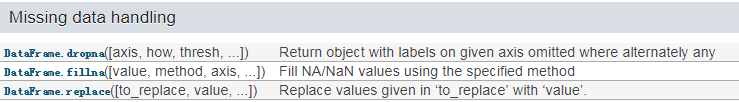

**滤除缺失值**，用dropna函数进行滤除

In [109]:
data = {'id':[1001,1002,1003,1004,1005,1006], 
        'date':pd.date_range('20130102', periods=6),
        'city':['Beijing ', np.nan, ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
        'age':[23,44,54,32,34,32],
        'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
        'price':[1200,np.nan,2133,5433,np.nan,4432]}
df = pd.DataFrame(data,columns =['id','date','city','category','age','price'],index=['one','two','three','four','five','six'])

In [3]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,NaN,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [117]:
# index1 = list(df.index)
# index1.append('seven')
# print(index1)
# df1 = pd.DataFrame(df,index=index1)

df.loc['severn'] = np.nan #赋值增加一行
# #df = df.drop('severn')  #删除行，默认axis=0
df

,id,date,city,category,age,price
one,1001.0,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002.0,2013-01-03,NaN,100-B,44.0,NaN
three,1003.0,2013-01-04,guangzhou,110-A,54.0,2133.0
four,1004.0,2013-01-05,Shenzhen,110-C,32.0,5433.0
five,1005.0,2013-01-06,shanghai,210-A,34.0,NaN
six,1006.0,2013-01-07,BEIJING,130-F,32.0,4432.0
severn,NaN,NaT,NaN,NaN,NaN,NaN


In [126]:
index = [1,2]
index.append(4)
index.pop(1)

2

In [13]:
df.dropna(thresh=5) #至少需要5个非空数才删除对应的行

,id,date,city,category,age,price
one,1001.0,2013-01-02,Beijing,100-A,23.0,1200.0
three,1003.0,2013-01-04,guangzhou,110-A,54.0,2133.0
four,1004.0,2013-01-05,Shenzhen,110-C,32.0,5433.0
five,1005.0,2013-01-06,shanghai,210-A,34.0,NaN
six,1006.0,2013-01-07,BEIJING,130-F,32.0,4432.0


In [14]:
df

,id,date,city,category,age,price
one,1001.0,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002.0,2013-01-03,NaN,100-B,44.0,NaN
three,1003.0,2013-01-04,guangzhou,110-A,54.0,2133.0
four,1004.0,2013-01-05,Shenzhen,110-C,32.0,5433.0
five,1005.0,2013-01-06,shanghai,210-A,34.0,NaN
six,1006.0,2013-01-07,BEIJING,130-F,32.0,4432.0
severn,NaN,NaT,NaN,NaN,NaN,NaN


In [15]:
df.dropna(axis=1,thresh=5) #按行删除，对应行满足非缺失值少于5个就会删除

,id,date,city,category,age
one,1001.0,2013-01-02,Beijing,100-A,23.0
two,1002.0,2013-01-03,NaN,100-B,44.0
three,1003.0,2013-01-04,guangzhou,110-A,54.0
four,1004.0,2013-01-05,Shenzhen,110-C,32.0
five,1005.0,2013-01-06,shanghai,210-A,34.0
six,1006.0,2013-01-07,BEIJING,130-F,32.0
severn,NaN,NaT,NaN,NaN,NaN


In [4]:
df.dropna()#滤除任何含有缺失值的行

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [5]:
df.dropna(axis=1)#针对列向有nan值的情况

,id,date,category,age
one,1001,2013-01-02,100-A,23
two,1002,2013-01-03,100-B,44
three,1003,2013-01-04,110-A,54
four,1004,2013-01-05,110-C,32
five,1005,2013-01-06,210-A,34
six,1006,2013-01-07,130-F,32


In [6]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,NaN,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [7]:
df.dropna(how='all')

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,NaN,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [9]:
df.iloc[1]=np.nan#将第二行设置全为空
print(df)
df.dropna(how='all')#how='all'只针对全为空的行；如果加上axis=1，则只针对全为空的列

           id       date         city category   age   price
one    1001.0 2013-01-02     Beijing     100-A  23.0  1200.0
two       NaN        NaT          NaN      NaN   NaN     NaN
three  1003.0 2013-01-04   guangzhou     110-A  54.0  2133.0
four   1004.0 2013-01-05     Shenzhen    110-C  32.0  5433.0
five   1005.0 2013-01-06     shanghai    210-A  34.0     NaN
six    1006.0 2013-01-07     BEIJING     130-F  32.0  4432.0


,id,date,city,category,age,price
one,1001.0,2013-01-02,Beijing,100-A,23.0,1200.0
three,1003.0,2013-01-04,guangzhou,110-A,54.0,2133.0
four,1004.0,2013-01-05,Shenzhen,110-C,32.0,5433.0
five,1005.0,2013-01-06,shanghai,210-A,34.0,NaN
six,1006.0,2013-01-07,BEIJING,130-F,32.0,4432.0


在很多情况下，你可能不想滤除缺失值，而是想通过其他方式填补这些空洞。

**填充缺失值**，pandas提供了fillna()函数

In [22]:
data = {'id':[1001,1002,1003,1004,1005,1006], 
        'date':pd.date_range('20130102', periods=6),
        'city':['Beijing ', 'SH', ' guangzhou ', 'Shenzhen', 'shanghai', 'BEIJING '],
        'age':[23,44,54,32,34,32],
        'category':['100-A','100-B','110-A','110-C','210-A','130-F'],
        'price':[1200,np.nan,np.nan,5433,np.nan,4432]}
df = pd.DataFrame(data,columns =['id','date','city','category','age','price'],index=['one','two','three','four','five','six'])
#df.fillna(0)#可以直接进行填充
#也可以通过字典进行填充
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,NaN
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [23]:
df['price'].fillna(method='ffill',limit=1) #向上填充，连续性填充只填充一次

one      1200.0
two      1200.0
three       NaN
four     5433.0
five     5433.0
six      4432.0
Name: price, dtype: float64

In [24]:
df.fillna({'price':19999}) #使用字典进行整列填充

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,19999.0
three,1003,2013-01-04,guangzhou,110-A,54,19999.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,19999.0
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [26]:
df.fillna(axis=1,method='ffill')#按照axis=1向前填充缺失值

,id,date,city,category,age,price
one,1001,2013-01-02 00:00:00,Beijing,100-A,23,1200
two,1002,2013-01-03 00:00:00,SH,100-B,44,44
three,1003,2013-01-04 00:00:00,guangzhou,110-A,54,54
four,1004,2013-01-05 00:00:00,Shenzhen,110-C,32,5433
five,1005,2013-01-06 00:00:00,shanghai,210-A,34,34
six,1006,2013-01-07 00:00:00,BEIJING,130-F,32,4432


In [20]:
help(pd.DataFrame.fillna)

Help on function fillna in module pandas.core.frame:

fillna(self, value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
    Fill NA/NaN values using the specified method
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame). (values not
        in the dict/Series/DataFrame will not be filled). This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use NEXT valid observation to fill gap
    axis : {0 or 'index', 1 or 'columns'}
    inplace : boolean, default False
        If True, fill in place. Note: this will modify any


In [27]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,NaN
three,1003,2013-01-04,guangzhou,110-A,54,NaN
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,NaN
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [12]:
df.fillna({'price':3000.0})
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,3000.0
three,1003,2013-01-04,guangzhou,110-A,54,2133.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,3000.0
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [28]:
#fillna默认返回新对象，但也可以通过修改参数对现有对象进行就地修改
df.fillna({'price':3000.0},inplace=True)#通过设置inplace=Ture，可以保证每次返回的被填充对象的引用
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23,1200.0
two,1002,2013-01-03,SH,100-B,44,3000.0
three,1003,2013-01-04,guangzhou,110-A,54,3000.0
four,1004,2013-01-05,Shenzhen,110-C,32,5433.0
five,1005,2013-01-06,shanghai,210-A,34,3000.0
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [33]:
df.iloc[2:,4] = np.nan
df.iloc[4:,5] = np.nan
df.iloc[5,4]=20
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,SH,100-B,44.0,3000.0
three,1003,2013-01-04,guangzhou,110-A,NaN,3000.0
four,1004,2013-01-05,Shenzhen,110-C,NaN,5433.0
five,1005,2013-01-06,shanghai,210-A,NaN,NaN
six,1006,2013-01-07,BEIJING,130-F,20.0,NaN


In [34]:
df.fillna(method='ffill',limit=2)

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,SH,100-B,44.0,3000.0
three,1003,2013-01-04,guangzhou,110-A,44.0,3000.0
four,1004,2013-01-05,Shenzhen,110-C,44.0,5433.0
five,1005,2013-01-06,shanghai,210-A,NaN,5433.0
six,1006,2013-01-07,BEIJING,130-F,20.0,5433.0


In [14]:
df.iloc[2:,4]=np.nan
df.iloc[4:,5]=np.nan
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,SH,100-B,44.0,3000.0
three,1003,2013-01-04,guangzhou,110-A,NaN,2133.0
four,1004,2013-01-05,Shenzhen,110-C,NaN,5433.0
five,1005,2013-01-06,shanghai,210-A,NaN,NaN
six,1006,2013-01-07,BEIJING,130-F,NaN,NaN


In [16]:
df.fillna(method='ffill',limit=1)

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,SH,100-B,44.0,3000.0
three,1003,2013-01-04,guangzhou,110-A,44.0,2133.0
four,1004,2013-01-05,Shenzhen,110-C,NaN,5433.0
five,1005,2013-01-06,shanghai,210-A,NaN,5433.0
six,1006,2013-01-07,BEIJING,130-F,NaN,NaN


也可以通过replace()对缺失值进行处理。

In [35]:
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,SH,100-B,44.0,3000.0
three,1003,2013-01-04,guangzhou,110-A,NaN,3000.0
four,1004,2013-01-05,Shenzhen,110-C,NaN,5433.0
five,1005,2013-01-06,shanghai,210-A,NaN,NaN
six,1006,2013-01-07,BEIJING,130-F,20.0,NaN


In [38]:
df['age'].replace(np.nan,20)

one      23.0
two      44.0
three    20.0
four     20.0
five     20.0
six      20.0
Name: age, dtype: float64

In [39]:
df['age']=df['age'].replace(np.nan,35)
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,SH,100-B,44.0,3000.0
three,1003,2013-01-04,guangzhou,110-A,35.0,3000.0
four,1004,2013-01-05,Shenzhen,110-C,35.0,5433.0
five,1005,2013-01-06,shanghai,210-A,35.0,NaN
six,1006,2013-01-07,BEIJING,130-F,35.0,NaN


In [41]:
df.loc['six']=df.loc['six'].replace(np.nan,10000)
df

,id,date,city,category,age,price
one,1001,2013-01-02,Beijing,100-A,23.0,1200.0
two,1002,2013-01-03,SH,100-B,44.0,3000.0
three,1003,2013-01-04,guangzhou,110-A,35.0,3000.0
four,1004,2013-01-05,Shenzhen,110-C,35.0,5433.0
five,1005,2013-01-06,shanghai,210-A,35.0,NaN
six,1006,2013-01-07,BEIJING,130-F,35.0,10000.0


在这里顺便也扩展一下replace()。

In [32]:
df['city']=df['city'].replace('SH','Shanghai')
df['city']=df['city'].str.upper()
df

,id,date,city,category,age,price
one,1001,2013-01-02,BEIJING,100-A,23.0,1200.0
two,1002,2013-01-03,SHANGHAI,100-B,44.0,3000.0
three,1003,2013-01-04,GUANGZHOU,110-A,20.0,2133.0
four,1004,2013-01-05,SHENZHEN,110-C,20.0,5433.0
five,1005,2013-01-06,SHANGHAI,210-A,20.0,NaN
six,1006,2013-01-07,BEIJING,130-F,20.0,NaN


## 4.2 字符串处理

Series包含专门的字符串的处理函数，详情见[官方文档](http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling)。

pandas也包含了很多字符串的处理方法，我们主要介绍比较常用的：
+ contains
+ strip
+ split
+ lower和upper、title
+ join
+ slice  切片

In [24]:
df['city'] = df['city'].replace('SH','Shanghai')
df['city'] = df['city'].str.strip().str.upper()
df

,id,date,city,category,age,price
one,1001,2013-01-02,BEIJING,100-A,23,1200.0
two,1002,2013-01-03,SHANGHAI,100-B,44,3000.0
three,1003,2013-01-04,GUANGZHOU,110-A,54,2133.0
four,1004,2013-01-05,SHENZHEN,110-C,32,5433.0
five,1005,2013-01-06,SHANGHAI,210-A,34,3000.0
six,1006,2013-01-07,BEIJING,130-F,32,4432.0


In [43]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [35]:
s=s.str.lower()
s

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [23]:
s=s.str.lower()#全部转化为小写
s

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [24]:
s.str.upper()#全部转化为大写

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

In [44]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [36]:
s.str.len()

0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
5    NaN
6    4.0
7    3.0
8    3.0
dtype: float64

In [25]:
print(len(s))
s.str.len()#每个元素字符串的长度

9


0    1.0
1    1.0
2    1.0
3    4.0
4    4.0
5    NaN
6    4.0
7    3.0
8    3.0
dtype: float64

In [107]:
help(pd.DataFrame.drop_duplicates)

Help on function drop_duplicates in module pandas.core.frame:

drop_duplicates(self, subset=None, keep='first', inplace=False)
    Return DataFrame with duplicate rows removed, optionally only
    considering certain columns
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns
    keep : {'first', 'last', False}, default 'first'
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.
    inplace : boolean, default False
        Whether to drop duplicates in place or to return a copy
    
    Returns
    -------
    deduplicated : DataFrame



In [48]:
idx = pd.Index([' jack', 'jill ', ' jesse ', 'frank'])
print(idx)
idx = idx.str.strip()  #去除空白字符
print(idx)

Index([' jack', 'jill ', ' jesse ', 'frank'], dtype='object')
Index(['jack', 'jill', 'jesse', 'frank'], dtype='object')


In [52]:
df = pd.DataFrame(np.random.randn(3, 2), columns=[' Column A ', ' Column B '],index=range(3))
print(df)
df.columns = df.columns.str.strip().str.replace(' ','_')#对列名称去除空白符，并且用‘-’代替字之间的‘ ’
print(df)

    Column A    Column B 
0    0.236580   -0.526107
1    0.678764    0.814039
2   -2.062617   -0.870511
   Column_A  Column_B
0  0.236580 -0.526107
1  0.678764  0.814039
2 -2.062617 -0.870511


In [57]:
s2 = pd.Series([' a_b_c', ' c_d_e ', np.nan, ' f_g_h','aa'])

s = s2.str.split('_',n=1)#按照‘-’进行拆分,n=1表示只拆一个
print(s)
s.str.join('_')#拼接

0     [ a, b_c]
1    [ c, d_e ]
2           NaN
3     [ f, g_h]
4          [aa]
dtype: object


0      a_b_c
1     c_d_e 
2        NaN
3      f_g_h
4         aa
dtype: object

In [46]:
s2
s2.str.contains('a') #检查每个元素是否包含‘a’

0     True
1    False
2      NaN
3    False
4     True
dtype: object

In [106]:
s = list('abcb')
'_'.join(s)

'a_b_c_b'

In [30]:
s = s2.str.split('_')
print(s)
s=s.str.join('_')
print(s)

0     [ a, b, c]
1    [ c, d, e ]
2            NaN
3     [ f, g, h]
4           [aa]
dtype: object
0      a_b_c
1     c_d_e 
2        NaN
3      f_g_h
4         aa
dtype: object


更多的操作方法见官方的文档的[Working with Text Data](http://pandas.pydata.org/pandas-docs/stable/text.html#working-with-text-data)

## 4.3 数据转换

接下来我们学习数据过滤、清洗以及其他的转换工作。

### 4.3.1 删除重复项

In [58]:
data=pd.DataFrame({'k1':['one']*3+['two']*4+['one']*1,
                   'k2':[1,1,2,3,3,4,4,1]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4
7,one,1


In [61]:
data.duplicated()#判断是否重复

0    False
1     True
2    False
3    False
4     True
5    False
6     True
7     True
dtype: bool

In [62]:
data.duplicated(keep='last')# 结果中的True表示重复

0     True
1     True
2    False
3     True
4    False
5     True
6    False
7    False
dtype: bool

In [34]:
data.drop_duplicates(keep='last') #去重,从后面开始计算是否重复

,k1,k2
2,one,2
4,two,3
6,two,4
7,one,1


In [33]:
data.drop_duplicates(keep='first') #去重,从前面开始计算是否重复

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [39]:
data=pd.DataFrame({'k1':['one']*3+['two']*4,
                   'k2':[1,1,2,3,3,4,4]})
print(data)
data.duplicated()#判断各行是否有重复项

    k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4


0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [40]:
data.drop_duplicates()#将各行的重复项进行删除，默认从头开始计算是否是重复项

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


duplicated()和drop_duplicates()默认的是全部列，我们也可以指定某一列过滤重复项

In [63]:
data['v1']=np.arange(8)#为了表示的更加清楚，在添加一列
print(data)

# data.drop_duplicates(['k1','k2'],keep='last')

    k1  k2  v1
0  one   1   0
1  one   1   1
2  one   2   2
3  two   3   3
4  two   3   4
5  two   4   5
6  two   4   6
7  one   1   7


In [65]:
data.drop_duplicates(keep='last') 

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6
7,one,1,7


In [67]:
data.drop_duplicates(['k1','k2'],keep='last')  #若某行的k1和k2和其他行有重复的k1和k2，则丢弃

,k1,k2,v1
2,one,2,2
4,two,3,4
6,two,4,6
7,one,1,7


### 4.3.2 重命名轴索引

In [68]:
data = pd.DataFrame(np.arange(12).reshape(3,4),index=['Shenzhen','Shanghai','Beijing'],columns=['one','two','three','four'])
data.index = data.index.str.upper()
data.index

Index(['SHENZHEN', 'SHANGHAI', 'BEIJING'], dtype='object')

In [69]:
data.columns=data.columns.str.upper()
data

,ONE,TWO,THREE,FOUR
SHENZHEN,0,1,2,3
SHANGHAI,4,5,6,7
BEIJING,8,9,10,11


In [37]:
data.index = ['SZ','SH','BJ']
data

,ONE,TWO,THREE,FOUR
SZ,0,1,2,3
SH,4,5,6,7
BJ,8,9,10,11


In [69]:
def maxs(a):
    return max(a)
def mins(a):
    return min(a)
def function(f,a):
    x=f(a)
    return x

a = [1,5,2,4,9,3]
function(mins,a)

1

In [71]:
help(pd.DataFrame.rename)

Help on function rename in module pandas.core.frame:

rename(self, mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False, level=None)
    Alter axes labels.
    
    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.
    
    See the :ref:`user guide <basics.rename>` for more.
    
    Parameters
    ----------
    mapper, index, columns : dict-like or function, optional
        dict-like or functions transformations to apply to
        that axis' values. Use either ``mapper`` and ``axis`` to
        specify the axis to target with ``mapper``, or ``index`` and
        ``columns``.
    axis : int or str, optional
        Axis to target with ``mapper``. Can be either the axis name
        ('index', 'columns') or number (0, 1). The default is 'index'.
    copy : boolean, default True
        Also copy underlying data
    inplace : boolean, default False
        W

In [78]:
data.rename({'SHENZHEN':'SZ'},axis='index')

,ONE,TWO,THREE,FOUR
SZ,0,1,2,3
SHANGHAI,4,5,6,7
BEIJING,8,9,10,11


In [79]:
data.rename(index={'SHENZHEN':'sz'})

,ONE,TWO,THREE,FOUR
sz,0,1,2,3
SHANGHAI,4,5,6,7
BEIJING,8,9,10,11


In [72]:
data.rename(index=str.title,columns=str.lower)

,one,two,three,four
Shenzhen,0,1,2,3
Shanghai,4,5,6,7
Beijing,8,9,10,11


In [38]:
data.rename(index=str.title,columns=str.upper)#对行名和列名进行相应的处理

,ONE,TWO,THREE,FOUR
Sz,0,1,2,3
Sh,4,5,6,7
Bj,8,9,10,11


In [39]:
data

,ONE,TWO,THREE,FOUR
SZ,0,1,2,3
SH,4,5,6,7
BJ,8,9,10,11


In [40]:
data.rename(index={'SZ':'Guangzhou'},columns={'THREE':'python'})#也可以传入字典，对部分轴进行更新

,ONE,TWO,python,FOUR
Guangzhou,0,1,2,3
SH,4,5,6,7
BJ,8,9,10,11


### 4.3.3 离散化

为了便于分析，连续数据常常需要被离散化或者拆分为“面元”。需要用到cut()和qcut()函数。

cut()函数的面向边界对数据进行划分。函数详情点击[这里](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html#pandas.cut)。

In [76]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False)
    Return indices of half-open bins to which each value of `x` belongs.
    
    Parameters
    ----------
    x : array-like
        Input array to be binned. It has to be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        If `bins` is an int, it defines the number of equal-width bins in the
        range of `x`. However, in this case, the range of `x` is extended
        by .1% on each side to include the min or max values of `x`. If
        `bins` is a sequence it defines the bin edges allowing for
        non-uniform bin width. No extension of the range of `x` is done in
        this case.
    right : bool, optional
        Indicates whether the bins include the rightmost edge or not. If
        right == True (the default), then the bins [1,2,3,4] indicate
        (1,2], (2,3], (3,4].
    labels : array or boole

In [80]:
age = np.random.randint(20,60,12)
print(age)
bins=[20,30,40,50,60]
cats=pd.cut(age,bins)
print(cats)
print(cats.value_counts())

[24 46 53 47 58 35 50 45 59 22 47 47]
[(20, 30], (40, 50], (50, 60], (40, 50], (50, 60], ..., (40, 50], (50, 60], (20, 30], (40, 50], (40, 50]]
Length: 12
Categories (4, interval[int64]): [(20, 30] < (30, 40] < (40, 50] < (50, 60]]
(20, 30]    2
(30, 40]    1
(40, 50]    6
(50, 60]    3
dtype: int64


In [81]:
li=['one','two','three','four']
cats=pd.cut(age,4,right=False,labels=li)#根据最大值最小值等长划分,bins=4,分成4等份
print(cats)
print(cats.value_counts())

[[22.0, 31.25), [40.5, 49.75), [49.75, 59.037), [40.5, 49.75), [49.75, 59.037), ..., [40.5, 49.75), [49.75, 59.037), [22.0, 31.25), [40.5, 49.75), [40.5, 49.75)]
Length: 12
Categories (4, interval[float64]): [[22.0, 31.25) < [31.25, 40.5) < [40.5, 49.75) < [49.75, 59.037)]
[22.0, 31.25)      2
[31.25, 40.5)      1
[40.5, 49.75)      5
[49.75, 59.037)    4
dtype: int64


In [85]:
age = np.random.randint(20,80,20)
cats = pd.cut(age,5,right=True)
print(cats)
print(cats.value_counts())

[(56.0, 67.0], (45.0, 56.0], (45.0, 56.0], (22.945, 34.0], (22.945, 34.0], ..., (67.0, 78.0], (45.0, 56.0], (67.0, 78.0], (67.0, 78.0], (34.0, 45.0]]
Length: 20
Categories (5, interval[float64]): [(22.945, 34.0] < (34.0, 45.0] < (45.0, 56.0] < (56.0, 67.0] < (67.0, 78.0]]
(22.945, 34.0]    5
(34.0, 45.0]      3
(45.0, 56.0]      5
(56.0, 67.0]      3
(67.0, 78.0]      4
dtype: int64


qcut()函数可以根据样本的分位数对数据进行面元划分。了解函数参数和更多用法点击[这里](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html#pandas.qcut)。

In [130]:
data = np.random.randn(1000)
data

array([-8.79727939e-01,  1.61324861e-01, -9.61362789e-01,  1.17492987e-01,
        8.22706627e-01, -1.47471694e+00, -8.53002143e-01, -6.23953120e-01,
        1.13560557e+00, -5.44518153e-01,  1.03841968e+00,  9.56738556e-01,
        1.62559853e+00, -1.65953936e-01, -5.06461001e-01, -9.49367638e-01,
       -5.15840377e-01, -1.17690702e+00, -5.49809836e-01,  1.28985500e+00,
       -5.93031145e-01,  7.38954962e-01,  2.09867400e+00,  1.22035379e+00,
        9.68420792e-01, -7.14685951e-01,  1.69744769e-01,  5.22916321e-01,
       -1.29629036e+00,  5.95048482e-01,  1.66046781e+00, -8.45847713e-01,
        6.25584977e-01, -1.43212972e+00, -2.37319596e+00, -1.46390192e+00,
        8.55456639e-01, -2.02481639e-01, -2.27731893e+00, -4.79532589e-01,
        2.42237171e-01, -1.87668714e+00,  1.65941450e-01,  4.04785678e-01,
       -1.11225478e+00, -1.29774236e+00,  7.51258158e-01,  3.87419978e-01,
       -2.14278677e-01, -9.21642162e-01,  1.63626346e+00, -4.83724030e-01,
        7.31983834e-01, -

In [131]:
pd.qcut(data,2).value_counts()

(-3.846, 0.0279]    500
(0.0279, 3.703]     500
dtype: int64

In [132]:
pd.qcut(data,5).value_counts()#等频划分

(-3.846, -0.836]    200
(-0.836, -0.212]    200
(-0.212, 0.242]     200
(0.242, 0.829]      200
(0.829, 3.703]      200
dtype: int64

In [133]:
pd.qcut(data,[0,0.25,0.5,0.75,1]).value_counts()#等频划分

(-3.846, -0.649]    250
(-0.649, 0.0279]    250
(0.0279, 0.658]     250
(0.658, 3.703]      250
dtype: int64

In [135]:
df = np.random.randint(0,100,10)
pd.qcut(df,5).value_counts()

(15.999, 36.4]    2
(36.4, 62.2]      2
(62.2, 67.6]      2
(67.6, 79.2]      2
(79.2, 84.0]      2
dtype: int64

# 练习

什么样的数据叫做脏数据/有问题的数据？我们用'311-service-requests.csv'服务请求数据来一起看看，这个数据量不算小，同时也有一些东西确实可以处理一下。

其实也没有特别好的办法，还是得先拿点数据出来看看。比如说我们这里观察到邮政编码可能有问题的字段。

需要提到的一点是 .unique() 函数有很巧的用处，我们把所有出现过的邮政编码列出来（之后再看看分布？），也许会有一些想法。

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
requests = pd.read_csv('data/311-service-requests.csv')
requests['Incident Zip'].unique()

d:\program files\python3.6\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array([11432.0, 11378.0, 10032.0, 10023.0, 10027.0, 11372.0, 11419.0,
       11417.0, 10011.0, 11225.0, 11218.0, 10003.0, 10029.0, 10466.0,
       11219.0, 10025.0, 10310.0, 11236.0, nan, 10033.0, 11216.0, 10016.0,
       10305.0, 10312.0, 10026.0, 10309.0, 10036.0, 11433.0, 11235.0,
       11213.0, 11379.0, 11101.0, 10014.0, 11231.0, 11234.0, 10457.0,
       10459.0, 10465.0, 11207.0, 10002.0, 10034.0, 11233.0, 10453.0,
       10456.0, 10469.0, 11374.0, 11221.0, 11421.0, 11215.0, 10007.0,
       10019.0, 11205.0, 11418.0, 11369.0, 11249.0, 10005.0, 10009.0,
       11211.0, 11412.0, 10458.0, 11229.0, 10065.0, 10030.0, 11222.0,
       10024.0, 10013.0, 11420.0, 11365.0, 10012.0, 11214.0, 11212.0,
       10022.0, 11232.0, 11040.0, 11226.0, 10281.0, 11102.0, 11208.0,
       10001.0, 10472.0, 11414.0, 11223.0, 10040.0, 11220.0, 11373.0,
       11203.0, 11691.0, 11356.0, 10017.0, 10452.0, 10280.0, 11217.0,
       10031.0, 11201.0, 11358.0, 10128.0, 11423.0, 10039.0, 10010.0,
       11209.0,

下面我们就把unique()用起来，然后你会发现，确确实实是存在一些问题的，比如：
+ 为什么大部分被解析出数值，而有些被解析出字符串了？
+ 好多缺省值（nan）
+ 格式不一样，有些是29616-0759，有些是83
+ 有一些pandas不认的，比如'N/A'或者'NO CLUE'

那我们能做什么呢？
+ 规整'N/A'和'NO CLUE'到缺省值的“队列”里
+ 看看83是什么鬼，然后再决定怎么处理
+ 统一一下，全处理成字符串好啦

In [ ]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv('data/311-service-requests.csv',na_values=na_values, dtype={'Incident Zip': str})
requests['Incident Zip'].unique()

发现有5个，打算直接把这些都设置成缺省值(nan)的：requests[requests['Incident Zip'].str.contains('-').fillna(False)]['Incident Zip'] = np.nan。

后来查了查，发现邮编只有5位数，前五位确实是真是存在的邮编。所以需要截取一下。

In [ ]:
requests['Incident Zip'][requests['Incident Zip'].str.len()>5]

In [ ]:
requests['Incident Zip']=requests['Incident Zip'].str.slice(0,5)#对字符的前位进行切片提取
requests['Incident Zip'].unique()

发现'00000'根本不是什么美国加拿大的邮编，所以这个是不能这么处理的，还真得重新设为缺省值。

In [ ]:
requests.loc[requests['Incident Zip']=='00000','Incident Zip']=np.nan
unique_zips=requests['Incident Zip'].fillna(False).unique().astype('str')
unique_zips.sort()
unique_zips

0或者1开始的比较正确的邮编

In [ ]:
zips = requests['Incident Zip']
# 用is_close表示0或者1开始的比较正确的邮编
is_close = zips.str.startswith('0') | zips.str.startswith('1')
# 非缺省值但不以0或者1开始的邮编认为是有些困惑的
is_far = ~(is_close) & zips.notnull()
requests[is_far]['Incident Zip']

In [ ]:
requests.loc[is_far,['Incident Zip','City','Descriptor']]

刚才做的一大堆工作，其实只是告诉你，我们可以这样去处理和补齐数据。
但你实际上会发现，好像其实用city直接对应一下就可以补上一些东西啊。

In [ ]:
requests['City'].str.upper().value_counts()

### 汇总一下

所以汇总一下，我们在邮编这个字段，是这样做数据清洗的：

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv('data/311-service-requests.csv',na_values=na_values,dtype={'Incident Zip': str})

In [ ]:
def fix_zip_codes(zips):
    # 获取前五位
    zips = zips.str.slice(0, 5)
    
    # 设置00000位空值
    zero_zips = zips == '00000'
    zips[zero_zips] = np.nan
    
    return zips

In [ ]:
requests['Incident Zip'] = fix_zip_codes(requests['Incident Zip'])

In [ ]:
requests['Incident Zip'].unique()